In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

'''
EDA: Summary statistics and missing-value checks
Distribution of key variables (age, revenue, watch time)
Visualising login recency and subscription mix
Defining churn: users inactive for >60 days since their last login
Investigating churn patterns by subscription type and genre
'''
#load file
filepath = r'C:\Users\44759\OneDrive\Документы\Python\DataAnalysisPrep\Streaming_analytics\data\netflix_users.csv'
df = pd.read_csv(filepath)

print("Data loaded successfully")
print("Shape:", df.shape)

✅ Data loaded successfully
Shape: (25000, 8)


In [34]:
from IPython.display import display

print(" First 5 rows:")
display(df.head())

print("\n Column names:")
print(df.columns.tolist())



 First 5 rows:


,User_ID,Name,Age,Country,Subscription_Type,Watch_Time_Hours,Favorite_Genre,Last_Login
0,1,James Martinez,18,France,Premium,80.26,Drama,2024-05-12
1,2,John Miller,23,USA,Premium,321.75,Sci-Fi,2025-02-05
2,3,Emma Davis,60,UK,Basic,35.89,Comedy,2025-01-24
3,4,Emma Miller,44,USA,Premium,261.56,Documentary,2024-03-25
4,5,Jane Smith,68,USA,Standard,909.30,Drama,2025-01-14



 Column names:
['User_ID', 'Name', 'Age', 'Country', 'Subscription_Type', 'Watch_Time_Hours', 'Favorite_Genre', 'Last_Login']


In [36]:
print("ℹDataFrame Info:")
df.info()

print("\n Missing values per column:")
print(df.isna().sum())

print("\n Unique value counts (for first few columns):")
for col in df.columns[:5]:
    print(f"{col}: {df[col].nunique()} unique values")


ℹDataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            25000 non-null  int64  
 1   Name               25000 non-null  object 
 2   Age                25000 non-null  int64  
 3   Country            25000 non-null  object 
 4   Subscription_Type  25000 non-null  object 
 5   Watch_Time_Hours   25000 non-null  float64
 6   Favorite_Genre     25000 non-null  object 
 7   Last_Login         25000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.5+ MB

 Missing values per column:
User_ID              0
Name                 0
Age                  0
Country              0
Subscription_Type    0
Watch_Time_Hours     0
Favorite_Genre       0
Last_Login           0
dtype: int64

 Unique value counts (for first few columns):
User_ID: 25000 unique values
Name: 100 unique values
Age: 68

In [38]:
print(" Numerical Summary:")
display(df.describe())

print("\n Categorical Summary:")
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True).head(5))


 Numerical Summary:


,User_ID,Age,Watch_Time_Hours
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,46.482880,500.468858
std,7217.022701,19.594861,286.381815
min,1.000000,13.000000,0.120000
25%,6250.750000,29.000000,256.567500
50%,12500.500000,46.000000,501.505000
75%,18750.250000,63.000000,745.732500
max,25000.000000,80.000000,999.990000



 Categorical Summary:

Name:
Name
Michael Hernandez    0.01168
Katie Smith          0.01148
Sarah Brown          0.01148
Jane Williams        0.01112
Jane Johnson         0.01100
Name: proportion, dtype: float64

Country:
Country
UK         0.10368
Germany    0.10188
India      0.10020
USA        0.10012
Brazil     0.10012
Name: proportion, dtype: float64

Subscription_Type:
Subscription_Type
Premium     0.33608
Basic       0.33424
Standard    0.32968
Name: proportion, dtype: float64

Favorite_Genre:
Favorite_Genre
Horror         0.14616
Documentary    0.14544
Action         0.14356
Romance        0.14288
Comedy         0.14244
Name: proportion, dtype: float64

Last_Login:
Last_Login
2024-09-05    0.00368
2024-04-12    0.00364
2024-06-21    0.00352
2024-05-19    0.00352
2024-10-11    0.00352
Name: proportion, dtype: float64


In [40]:
print(" Duplicate rows:", df.duplicated().sum())
print(" Columns with >20% missing values:")
missing_ratio = df.isna().mean()
print(missing_ratio[missing_ratio > 0.2])

print("\n Quick numeric sanity check:")
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    print(f"{col}: min={df[col].min()}, max={df[col].max()}")


 Duplicate rows: 0
 Columns with >20% missing values:
Series([], dtype: float64)

 Quick numeric sanity check:
User_ID: min=1, max=25000
Age: min=13, max=80
Watch_Time_Hours: min=0.12, max=999.99


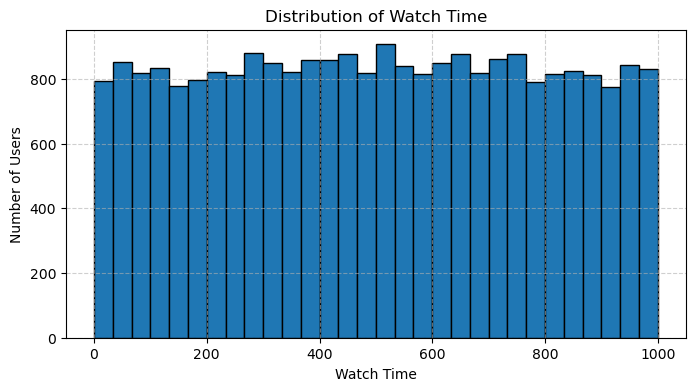

In [ ]:
# 1️ Histogram for Monthly Revenue
plt.figure(figsize=(8,4))
plt.hist(df['Watch_Time_Hours'], bins=30, edgecolor='black')
plt.title('Distribution of Watch Time')
plt.xlabel('Watch Time')
plt.ylabel('Number of Users')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [57]:
# Calculating churn based on last date oflogin
# define 'churned' as someone who has not logged in for more than x days (threshold)

df['Last_Login'] = pd.to_datetime(df['Last_Login'], errors='coerce')

#convert a days since last login feature - use 'today' as date of last login
today = df['Last_Login'].max()
print("Using latest login date as 'today':", today)
df['Days_Since_Login'] = (today - df['Last_Login']).dt.days

#define churn treshold
churn_threshold = 60
df['Churn'] = (df['Days_Since_Login'] > churn_threshold).astype(int)

# Count of churned vs active users
churn_counts = df['Churn'].value_counts()
print(churn_counts)

Using latest login date as 'today': 2025-03-08 00:00:00
Churn
1    20785
0     4215
Name: count, dtype: int64


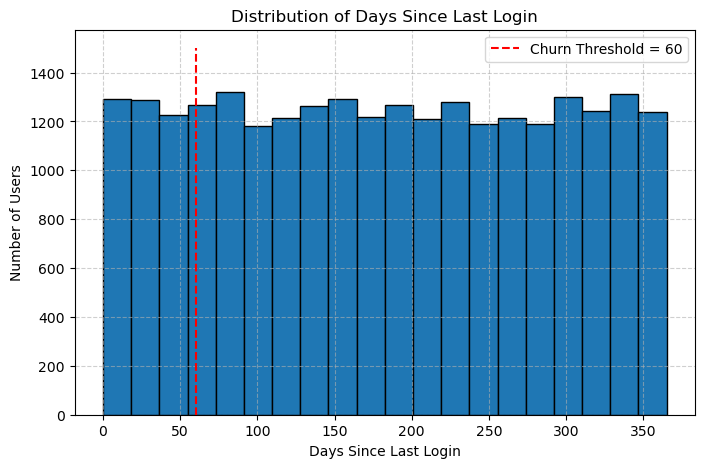

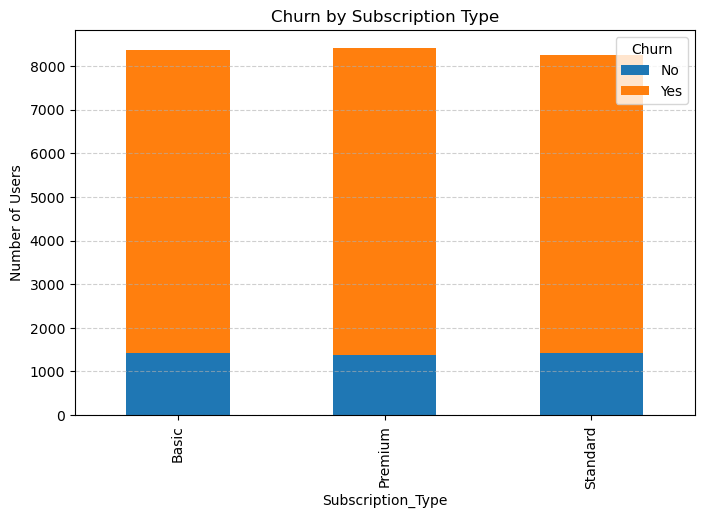

In [68]:
# visually check login history
plt.figure(figsize=(8,5))
plt.hist(df['Days_Since_Login'], bins=20, edgecolor='black')
plt.title('Distribution of Days Since Last Login')
plt.vlines(churn_threshold, 0, 1500, linestyle='--', color='r', label=f'Churn Threshold = {churn_threshold}')
plt.xlabel('Days Since Last Login')
plt.ylabel('Number of Users')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Bar Chart for Churn by Subscription Type
churn_counts = df.groupby('Subscription_Type')['Churn'].value_counts().unstack().fillna(0)
churn_counts.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title('Churn by Subscription Type')
plt.xlabel('Subscription_Type')
plt.ylabel('Number of Users')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

C:\Users\44759\AppData\Local\Temp\ipykernel_10488\3209399713.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=subs, patch_artist=True)


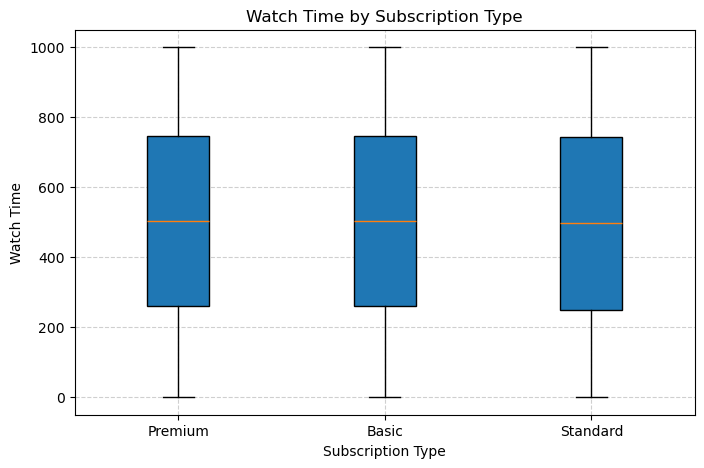

In [70]:
# 3️ Box Plot for Monthly Revenue by Subscription Type
plt.figure(figsize=(8,5))
subs = df['Subscription_Type'].unique()
data_to_plot = [df[df['Subscription_Type'] == s]['Watch_Time_Hours'] for s in subs]
plt.boxplot(data_to_plot, labels=subs, patch_artist=True)
plt.title('Watch Time by Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Watch Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()